<font color='BLUE'><u><b><h2>Data Science & Business Analytics Tasks</h2></b></u></font>

# GRIP @ The Sparks Foundation
<font color='GREEN'><h3><u>TASK 1</u> - Predict the percentage of an student based on the no. of study hours.</font></h3>
<font color='GREEN'> <h2><b>BY - Hemant Sharma</h2></b></font> 

Dataset Link - http://bit.ly/w-data
Github Link - 

Problem statement : <font color='GREEN'><b>What will be predicted score if a student studies for 9.25 hours/day?</b></font>

<h3><b>1>. <i>IMPORTING LIBRARIES</i></b></h3>

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')

<h3><b>2>. <i>IMPORTING DATASET</i></b></h3>
Dataset Link - https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv

In [6]:
train=pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")
train.shape


(25, 2)

In [7]:
train.head(25)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [8]:
train.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


<h3><b>3>. <i>DISTRIBUTION OF SCORES</i></b></h3>

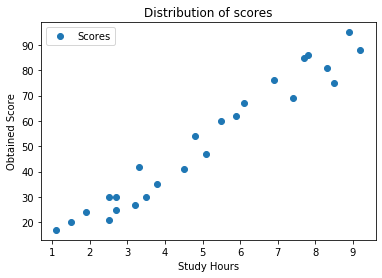

In [10]:
train.plot(x="Hours", y="Scores",style="o")
plt.title("Distribution of scores")
plt.xlabel("Study Hours") 
plt.ylabel("Obtained Score")
plt.show()

 <font color='GREEN'><b>By observing the distribution graph we can say here is a strong linear relationship between scores and study hours as it tends to a straight line. So this dataset is ideal to perform linear regression.</b></font>

<h3><u><b>4>. <i>TRAIN AND TEST SPLIT DATA</i></b></u></h3>

In [11]:
x1 = train.iloc[:,0].values
y1 = train.iloc[:,1].values
x = x1.reshape(-1,1)
y = y1.reshape(-1,1)

<h3><u><b>5>. <i>RANDOM LINEAR REGRESSION MODEL</i></b></u></h3>
<font color='BLUE'><b>(Applying on TEST data)</b><font>

In [20]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25,random_state=0)

In [21]:
from sklearn.linear_model import LinearRegression
linearRegressor= LinearRegression()
linearRegressor.fit(x_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

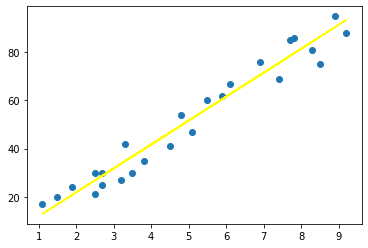

In [22]:
line = linearRegressor.coef_*x+linearRegressor.intercept_
plt.scatter(x, y)
plt.plot(x, line, color="yellow")
plt.show()

 <h3><u><b>5>. <i>ACCURACY SCORE FROM TRAINING AND TEST DATA</i></b></u></h3>

In [23]:
print('Test Score')
print(linearRegressor.score(x_test, y_test))
print('Training Score')
print(linearRegressor.score(x_train, y_train))

Test Score
0.9367661043365054
Training Score
0.9484509249326872


In [24]:
print(x_test) # Testing data -(Hours)
y_pred = linearRegressor.predict(x_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]
 [3.8]
 [1.9]]


In [25]:
df1 = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df1

,Actual,Predicted
0,20,16.844722
1,27,33.745575
2,69,75.500624
3,30,26.786400
4,62,60.588106
5,35,39.710582
6,24,20.821393


<h3><b>6>. <i>PREDICTION ON TEST AND TRAIN DATA</i></b><h3>

In [26]:
y_pred= linearRegressor.predict(x_test)
x_pred= linearRegressor.predict(x_train)

<h3><b>7>. <i>SOLUTION FOR PROBLEM STATEMENT</i></b></h3>

In [27]:
print('Score of student who studied for 9.25 hours a date', linearRegressor.predict([[9.25]]))

Score of student who studied for 9.25 hours a date [[93.89272889]]


In [28]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))

Mean Absolute Error: 4.130879918502486
Mean Squared Error: 20.33292367497997


<h3><b><font color="green">AFTER BUILDING THE LINEAR REGRESSION MODEL AND OBTAIN THE PREDICTION WE CAN CONCLUDE "PREDICTED SCORE OF A STUDENT STUDIES WHO STUDY 9.25 HRS/ DAY WILL BE ABLE TO SCORE 93.89"</font></b></h3>